In [ ]:
!pip install numpy tensorflow opencv-python matplotlib

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

IMPORT DATA

In [ ]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)

    return images

In [ ]:
cat_images = load_images('/content/drive/MyDrive/cat dog rill 100%/bahan/cat')
dog_images = load_images('/content/drive/MyDrive/cat dog rill 100%/bahan/dog')

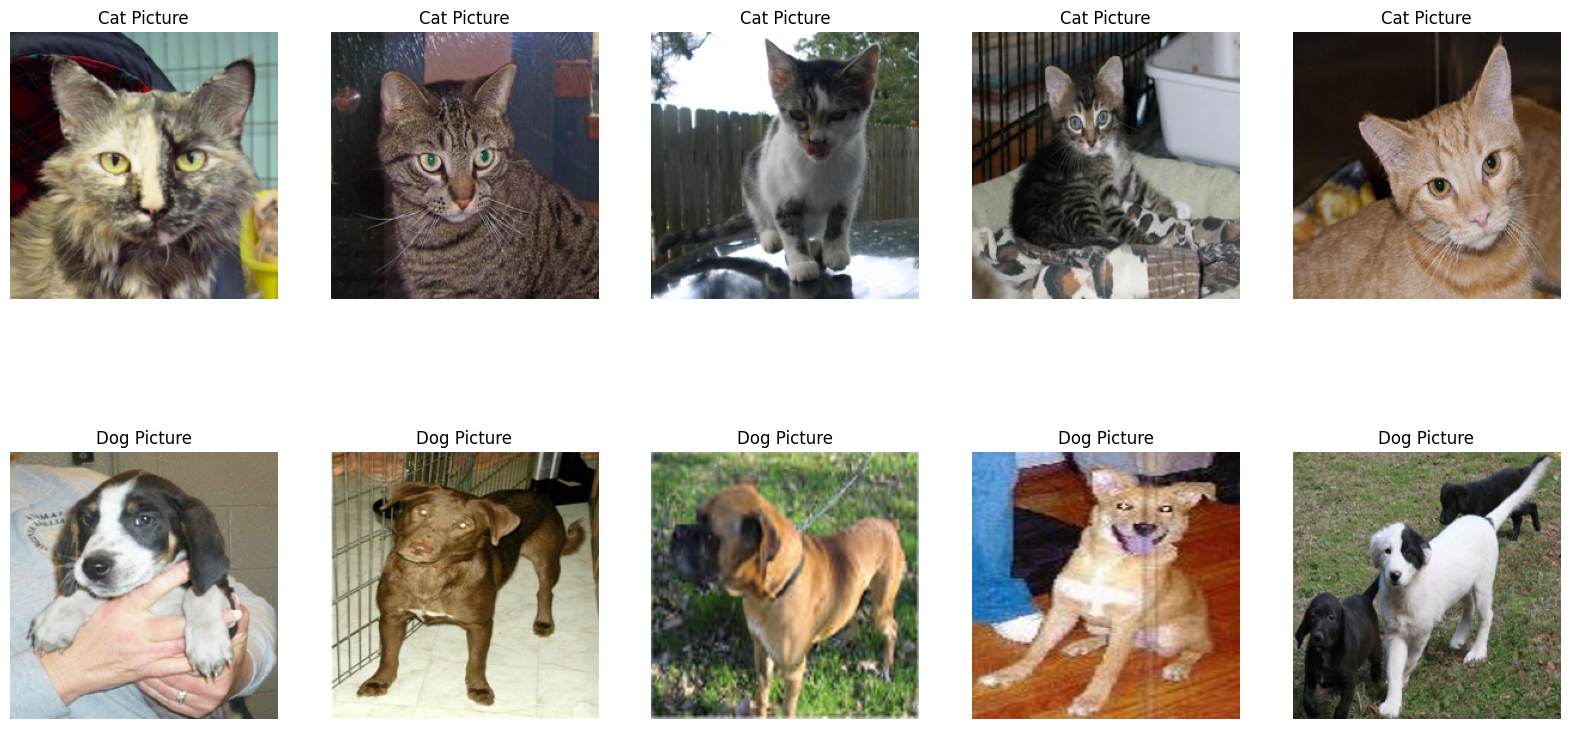

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Menampilkan gambar kucing
for i in range(5):
    axes[0, i].imshow(cat_images[i])  # Menampilkan gambar kucing
    axes[0, i].set_title('Cat Picture')  # Menetapkan judul
    axes[0, i].axis('off')  # Mematikan axis

# Menampilkan gambar dog
for i in range(5):
    axes[1, i].imshow(dog_images[i])  # Menampilkan gambar anjing
    axes[1, i].set_title('Dog Picture')  # Menetapkan judul
    axes[1, i].axis('off')  # Mematikan axis

plt.show()  # Menampilkan hasil

In [ ]:
type(cat_images)

list

In [ ]:
len(cat_images)

50

In [ ]:
len(dog_images)

50

PROSES LABELING

In [ ]:
def assign_labels(cat_images, dog_images):
    cat_labels = np.ones(len(cat_images))
    dog_labels = np.zeros(len(dog_images))
    return cat_labels, dog_labels

cat_labels, dog_labels = assign_labels(cat_images, dog_images)

In [ ]:
cat_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
dog_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(cat_labels)

numpy.ndarray

In [ ]:
data = cat_images + dog_images
labels = np.concatenate((cat_labels, dog_labels) , axis=0)

In [ ]:
data

[array([[[0.10588235, 0.12156863, 0.15686275],
         [0.0745098 , 0.09019608, 0.12156863],
         [0.03529412, 0.05098039, 0.09019608],
         ...,
         [0.50980392, 0.63529412, 0.62352941],
         [0.50196078, 0.62745098, 0.61960784],
         [0.49411765, 0.61960784, 0.61568627]],
 
        [[0.13333333, 0.15686275, 0.18039216],
         [0.14509804, 0.16470588, 0.19215686],
         [0.11764706, 0.13333333, 0.16862745],
         ...,
         [0.51372549, 0.63921569, 0.61960784],
         [0.50588235, 0.63137255, 0.61568627],
         [0.49411765, 0.61960784, 0.61176471]],
 
        [[0.14509804, 0.17254902, 0.19215686],
         [0.15686275, 0.18431373, 0.20784314],
         [0.16078431, 0.18823529, 0.21176471],
         ...,
         [0.51764706, 0.64313725, 0.61960784],
         [0.50588235, 0.63137255, 0.61568627],
         [0.49803922, 0.62352941, 0.61176471]],
 
        ...,
 
        [[0.68627451, 0.63529412, 0.4627451 ],
         [0.67058824, 0.61960784, 0.44705

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
data[0].shape

(224, 224, 3)

SPLITING DATA

In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

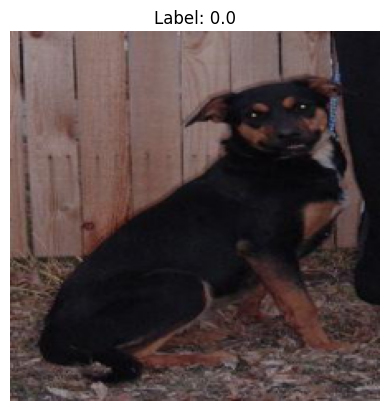

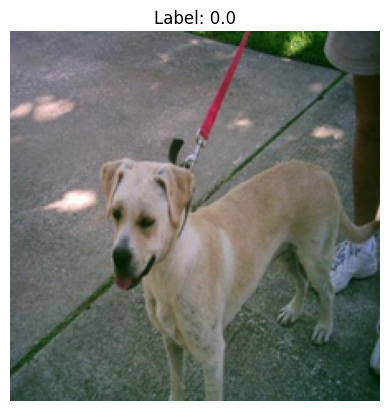

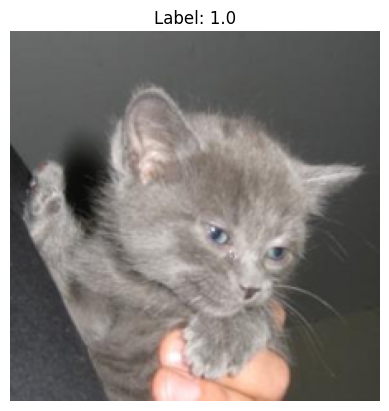

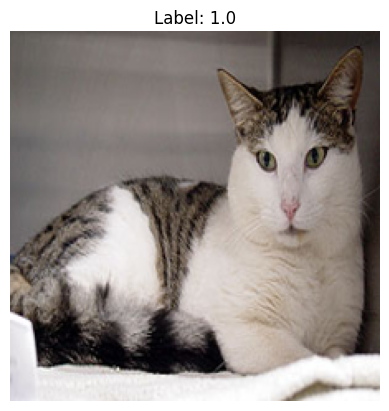

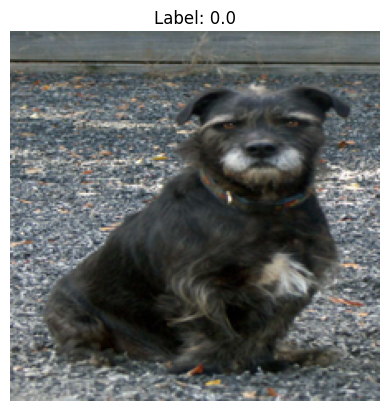

In [ ]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [ ]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
text = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

TRAINING


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 2)

Epoch 1/20
2/2 - 11s - 6s/step - accuracy: 0.4000 - loss: 39.2899 - val_accuracy: 0.3000 - val_loss: 12.3429
Epoch 2/20
2/2 - 14s - 7s/step - accuracy: 0.6000 - loss: 10.7186 - val_accuracy: 0.9000 - val_loss: 0.2873
Epoch 3/20
2/2 - 14s - 7s/step - accuracy: 0.4667 - loss: 7.3018 - val_accuracy: 0.4000 - val_loss: 2.3471
Epoch 4/20
2/2 - 9s - 4s/step - accuracy: 0.5333 - loss: 4.7198 - val_accuracy: 0.3500 - val_loss: 3.9399
Epoch 5/20
2/2 - 8s - 4s/step - accuracy: 0.6500 - loss: 2.8452 - val_accuracy: 0.4500 - val_loss: 1.4392
Epoch 6/20
2/2 - 9s - 4s/step - accuracy: 0.6000 - loss: 2.6523 - val_accuracy: 0.7500 - val_loss: 0.7464
Epoch 7/20
2/2 - 7s - 3s/step - accuracy: 0.6500 - loss: 1.6961 - val_accuracy: 0.9000 - val_loss: 0.3472
Epoch 8/20
2/2 - 9s - 5s/step - accuracy: 0.7167 - loss: 1.4429 - val_accuracy: 0.9000 - val_loss: 0.3304
Epoch 9/20
2/2 - 7s - 3s/step - accuracy: 0.7500 - loss: 0.9116 - val_accuracy: 0.4500 - val_loss: 1.1287
Epoch 10/20
2/2 - 11s - 6s/step - accura

In [ ]:
evaluation = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 0.7000 - loss: 0.6782


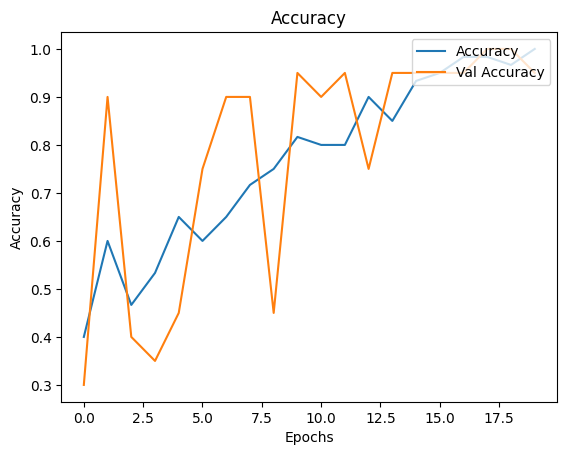

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

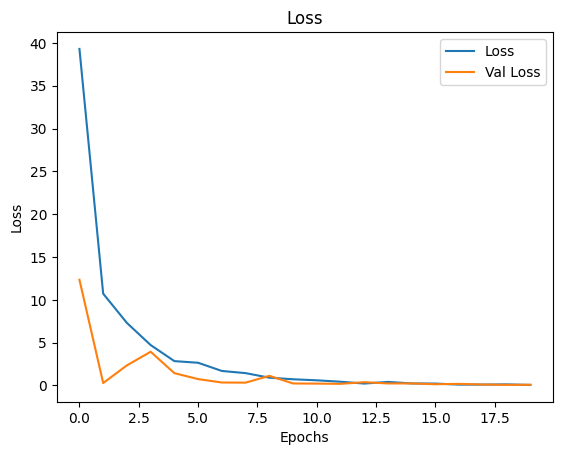

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/cat_dog.h5")

TESTING

In [ ]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Cat detected"
    else:
        return "Dog detected"

HASIL TESTING

Saving 10.jpg to 10.jpg


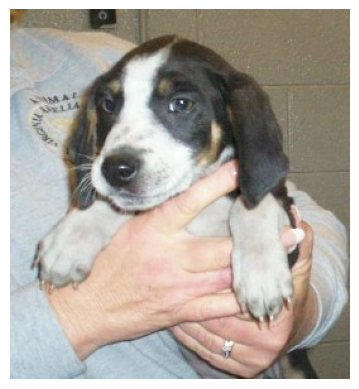

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Dog detected


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]

img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)